In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot #it s a simple linear regreesion model
import statsmodels.formula.api as smf
import numpy as np

In [2]:
cars=pd.read_csv("50_Startups.csv")
cars.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
cars.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

# correlation matrix

In [5]:
cars.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


# Scatterplot between variables along with histograms

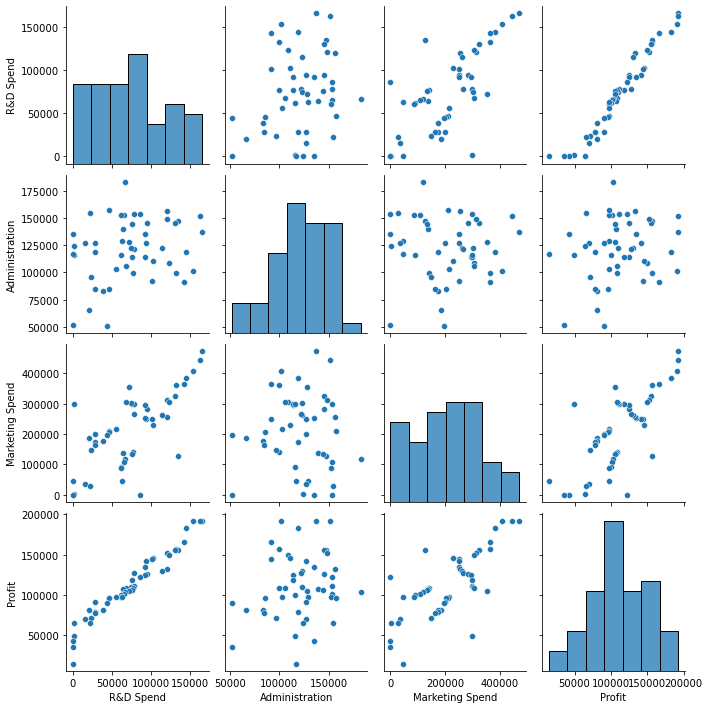

In [6]:
sns.pairplot(cars)

In [7]:
df=cars.rename({'R&D Spend':'spend','Marketing Spend':'ms'},axis=1)
df.head()

,spend,Administration,ms,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Preparing a model

In [8]:
#build model
model=smf.ols('Profit~spend+Administration+ms',data=df).fit()
model.params

Intercept         50122.192990
spend                 0.805715
Administration       -0.026816
ms                    0.027228
dtype: float64

In [9]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept          7.626218
spend             17.846374
Administration    -0.525507
ms                 1.655077
dtype: float64 
 Intercept         1.057379e-09
spend             2.634968e-22
Administration    6.017551e-01
ms                1.047168e-01
dtype: float64


In [10]:
#rsquared values
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Thu, 22 Dec 2022   Prob (F-statistic):           4.53e-30
Time:                        12:29:24   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
spend              0.8057      0.045     17.846      0.000       0.715       0.897
Administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
ms                 0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Simple Linear Regression Models

In [11]:
ml_a=smf.ols('Profit~Administration',data=df).fit()
ml_a

In [12]:
ml_a.tvalues,'\n',ml_a.pvalues                # t and pvalues

(Intercept         3.040044
 Administration    1.419493
 dtype: float64,
 '\n',
 Intercept         0.003824
 Administration    0.162217
 dtype: float64)

In [13]:
ml_m=smf.ols('Profit~ms',data=df).fit()
ml_m

In [14]:
ml_m.tvalues,'\n',ml_m.pvalues                # t and pvalues

(Intercept    7.808356
 ms           7.802657
 dtype: float64,
 '\n',
 Intercept    4.294735e-10
 ms           4.381073e-10
 dtype: float64)

In [15]:
ml_am=smf.ols('Profit~Administration+ms',data=df).fit()
ml_am

In [16]:
ml_am.tvalues,'\n',ml_am.pvalues

(Intercept         1.142741
 Administration    2.467779
 ms                8.281039
 dtype: float64,
 '\n',
 Intercept         2.589341e-01
 Administration    1.729198e-02
 ms                9.727245e-11
 dtype: float64)

# calculating vif

In [17]:
rsq_spend = smf.ols('spend~Administration+ms',data=df).fit().rsquared  
vif_spend = 1/(1-rsq_spend)

rsq_administration = smf.ols('Administration~spend+ms',data=df).fit().rsquared  
vif_administration = 1/(1-rsq_administration)

rsq_ms = smf.ols('ms~Administration+spend',data=df).fit().rsquared  
vif_ms = 1/(1-rsq_ms)

#storing vif values in new dataframe
d1={'variables':['spend','Administration','ms'],'vif':[vif_spend,vif_administration,vif_ms]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame



,variables,vif
0,spend,2.468903
1,Administration,1.175091
2,ms,2.326773


# residual analysis

# Q-Q plot

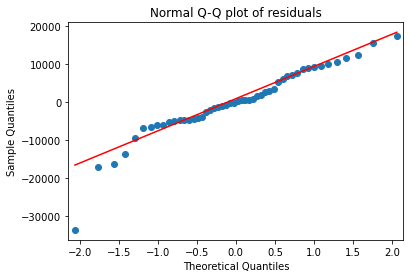

In [18]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [19]:
list(np.where(model.resid>10))

[array([ 1,  2,  3,  8, 10, 11, 12, 13, 16, 19, 20, 25, 28, 30, 34, 35, 36,
        37, 38, 40, 41, 42, 43, 44, 45], dtype=int64)]

# Residual Plot for Homoscedasticity

In [20]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

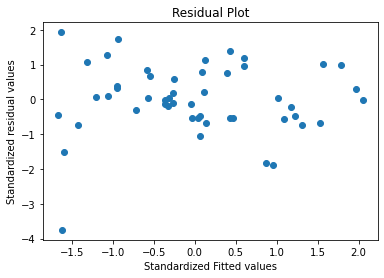

In [21]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [22]:
#we take out regressor plot when the scatter points does follow homoscediscity


# Residual Vs Regressors

eval_env: 1


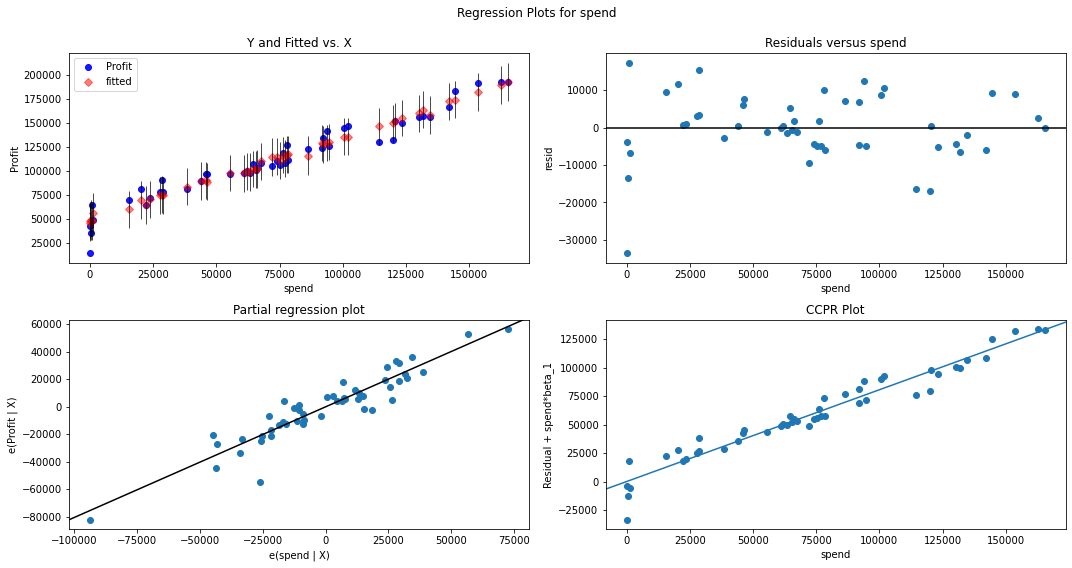

In [23]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "spend", fig=fig)
plt.show()

#in regressor plot we check that residual verses (column name) follow a pattern 
 ## it is checked in 2 no. plot
#if they follow pattern then we should drop that column and create a another model

eval_env: 1


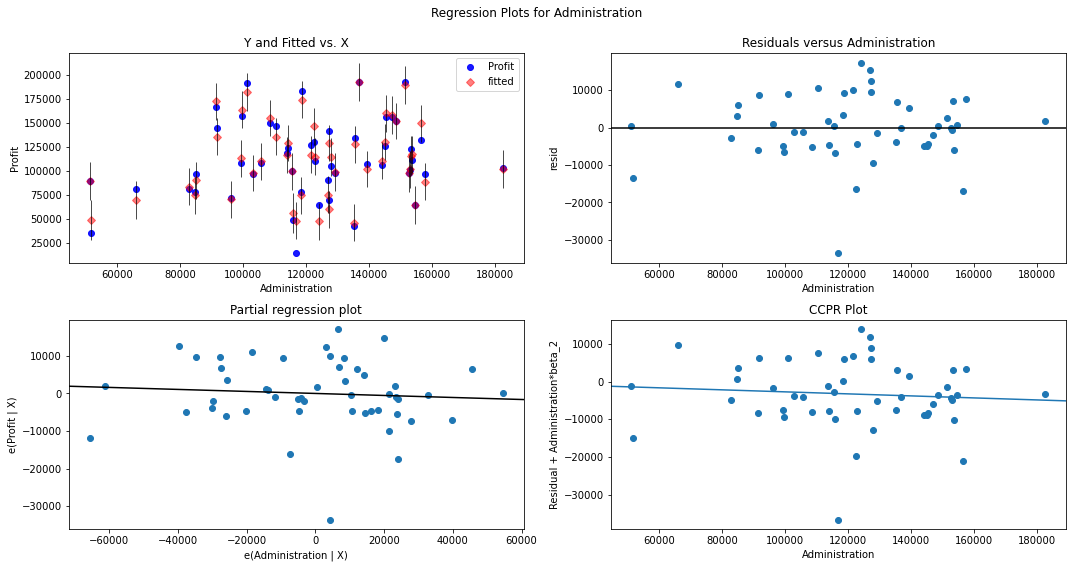

In [24]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Administration", fig=fig)
plt.show()

eval_env: 1


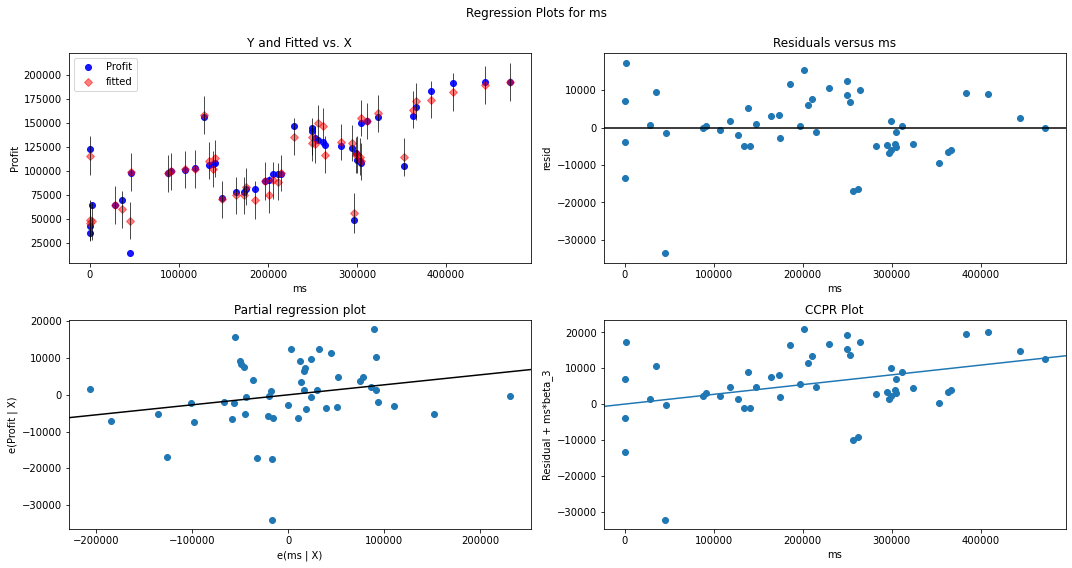

In [25]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "ms", fig=fig)
plt.show()

# Model Deletion Diagnostics


# Detecting Influencers/Outliers

# Cook’s Distance

In [26]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

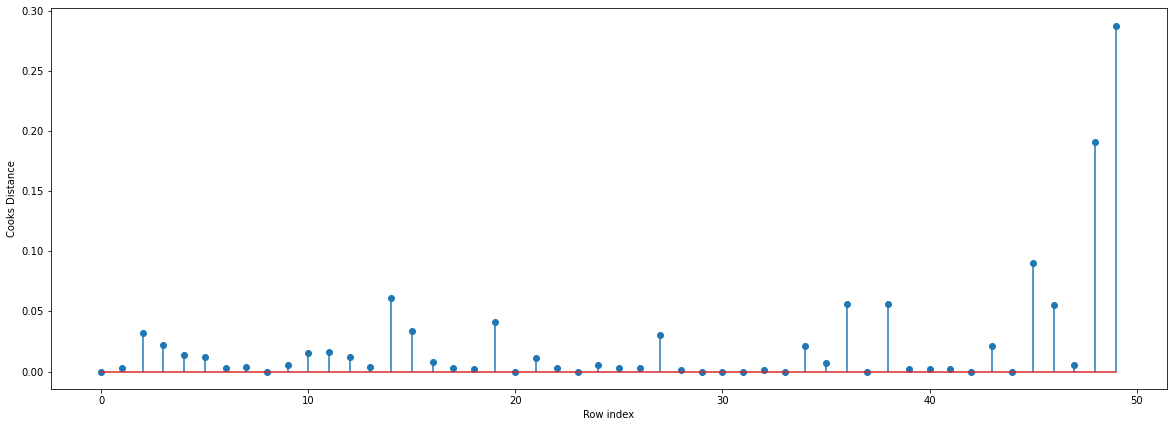

In [27]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [28]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.28808229275432634)

# hence this model is fit .



# we have improved the model
